# Important library included

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Dataset read

In [ ]:
# positive examples
features_virus_mirnas = pd.read_csv('/content/drive/MyDrive/features_virus_miRNAs.csv')

# The negative set is composed of a random set of hsa hairpin-like sequences 
features_unlabeled_hairpins = pd.read_csv('/content/drive/MyDrive/features_unlabeled_hairpins.csv') # Hairpins from hsa genome

In [ ]:
features_virus_mirnas

,sequence_names,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,...,mfe,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4
0,ebv-mir-BHRF1-2 MI0001065,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,...,-26.8,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000
1,ebv-mir-BHRF1-3 MI0001066,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,...,-22.8,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364
2,ebv-mir-BHRF1-1 MI0001064,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,...,-26.5,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545
3,ebv-mir-BART1 MI0001067,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,...,-30.7,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000
4,ebv-mir-BART2 MI0001068,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,...,-26.0,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,gga-let-7a-1 MI0001234,0.266667,0.166667,0.255556,0.311111,0.056180,0.067416,0.078652,0.067416,0.044944,...,-34.8,-36.16,0.110731,4.80,0.015111,0.131262,-0.386667,-0.915789,-0.193333,-1.023529
565,hsa-mir-365b MI0000769,0.270270,0.189189,0.261261,0.279279,0.100000,0.027273,0.090909,0.054545,0.081818,...,-39.3,-41.58,0.024633,13.53,0.020541,0.313828,-0.354054,-0.786000,-0.088514,-1.091667
566,aae-mir-10365 MI0037934,0.316456,0.151899,0.202532,0.329114,0.141026,0.051282,0.051282,0.076923,0.064103,...,-21.2,-23.00,0.053850,11.88,0.022785,0.432211,-0.268354,-0.757143,-0.089451,-0.757143
567,sly-MIR7981b MI0033704,0.254902,0.176471,0.205882,0.362745,0.089109,0.079208,0.049505,0.039604,0.029703,...,-46.3,-47.89,0.075723,12.03,0.015588,0.398537,-0.453922,-1.187179,-0.151307,-1.187179


In [ ]:
features_virus_mirnas.drop('sequence_names', inplace=True, axis=1)

In [ ]:
features_virus_mirnas['class'] = 1

In [ ]:
features_unlabeled_hairpins.drop('sequence_names', inplace=True, axis=1)

In [ ]:
features_unlabeled_hairpins['class'] = 0

In [ ]:
features_unlabeled_hairpins

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.430,0.114,0.278,0.177,0.179,0.051,0.128,0.064,0.051,0.013,...,-16.78,0.460,3.37,0.006,0.122,-0.206,-0.526,-0.069,-0.858,0
1,0.346,0.128,0.154,0.372,0.104,0.026,0.078,0.130,0.091,0.000,...,-13.84,0.050,6.70,0.024,0.206,-0.154,-0.545,-0.038,-0.480,0
2,0.188,0.175,0.237,0.400,0.025,0.025,0.076,0.063,0.051,0.013,...,-20.19,0.076,14.01,0.020,0.518,-0.233,-0.564,-0.058,-0.664,0
3,0.217,0.196,0.152,0.435,0.088,0.022,0.033,0.077,0.066,0.055,...,-14.19,0.040,11.90,0.022,0.385,-0.133,-0.381,-0.033,-0.555,0
4,0.203,0.230,0.135,0.432,0.041,0.027,0.027,0.110,0.055,0.082,...,-8.34,0.184,7.68,0.014,0.357,-0.099,-0.270,-0.049,-0.456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,0.237,0.100,0.287,0.375,0.025,0.025,0.063,0.114,0.038,0.000,...,-18.20,0.064,24.75,0.021,0.904,-0.206,-0.532,-0.069,-0.589,0
999884,0.305,0.162,0.152,0.381,0.115,0.010,0.038,0.135,0.058,0.048,...,-23.73,0.071,11.46,0.016,0.342,-0.210,-0.670,-0.053,-0.650,0
999885,0.394,0.182,0.136,0.288,0.108,0.092,0.092,0.108,0.108,0.015,...,-9.83,0.116,5.91,0.020,0.214,-0.129,-0.405,-0.043,-0.447,0
999886,0.263,0.188,0.175,0.375,0.063,0.063,0.051,0.089,0.063,0.025,...,-16.49,0.065,13.95,0.021,0.461,-0.185,-0.510,-0.046,-0.510,0


In [ ]:
da = [features_virus_mirnas, features_unlabeled_hairpins]

In [ ]:
df = pd.concat(da)
df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,...,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000,1
1,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,...,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364,1
2,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,...,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545,1
3,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,...,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000,1
4,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,...,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095,1


In [ ]:
df.fillna(value=0, inplace = True)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

# Estimating mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif


mutual = mutual_info_classif(X, y)

In [ ]:
mutual = pd.Series(mutual)
mutual.index = X_train.columns
mutual.sort_values(ascending=False)

 bp_number             0.011121
 sequence_length       0.005019
 mfe_efe_difference    0.004054
 gc_ratio              0.003486
 dP                    0.003233
                         ...   
 diversity             0.000555
 triplets22            0.000276
 triplets21            0.000183
 triplets23            0.000041
 triplets20            0.000036
Length: 73, dtype: float64

# Feature importance visualization

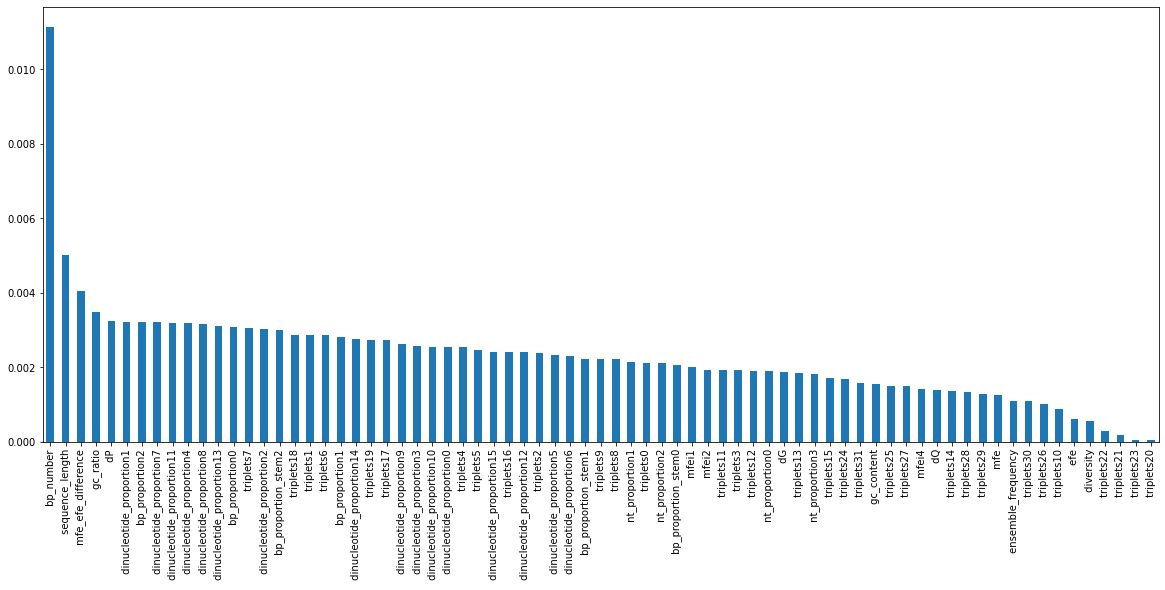

In [ ]:
mutual.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

# According to the above plot, I select the best 35 features 

In [ ]:
sel_cols = SelectKBest(mutual_info_classif, k=35)
z = sel_cols.fit(X, y)

In [ ]:
X.columns[sel_cols.get_support()]

Index([' dinucleotide_proportion0', ' dinucleotide_proportion1',
       ' dinucleotide_proportion2', ' dinucleotide_proportion3',
       ' dinucleotide_proportion4', ' dinucleotide_proportion5',
       ' dinucleotide_proportion6', ' dinucleotide_proportion7',
       ' dinucleotide_proportion8', ' dinucleotide_proportion9',
       ' dinucleotide_proportion10', ' dinucleotide_proportion11',
       ' dinucleotide_proportion12', ' dinucleotide_proportion13',
       ' dinucleotide_proportion14', ' dinucleotide_proportion15', ' gc_ratio',
       ' sequence_length', ' bp_number', ' dP', ' bp_proportion0',
       ' bp_proportion1', ' bp_proportion2', ' bp_proportion_stem2',
       ' triplets1', ' triplets2', ' triplets4', ' triplets5', ' triplets6',
       ' triplets7', ' triplets16', ' triplets17', ' triplets18',
       ' triplets19', ' mfe_efe_difference'],
      dtype='object')

In [ ]:
new_df = df.filter([' dinucleotide_proportion0', ' dinucleotide_proportion1',
       ' dinucleotide_proportion2', ' dinucleotide_proportion3',
       ' dinucleotide_proportion4', ' dinucleotide_proportion5',
       ' dinucleotide_proportion6', ' dinucleotide_proportion7',
       ' dinucleotide_proportion8', ' dinucleotide_proportion9',
       ' dinucleotide_proportion10', ' dinucleotide_proportion11',
       ' dinucleotide_proportion12', ' dinucleotide_proportion13',
       ' dinucleotide_proportion14', ' dinucleotide_proportion15', ' gc_ratio',
       ' sequence_length', ' bp_number', ' dP', ' bp_proportion0',
       ' bp_proportion1', ' bp_proportion2', ' bp_proportion_stem2',
       ' triplets1', ' triplets2', ' triplets4', ' triplets5', ' triplets6',
       ' triplets7', ' triplets16', ' triplets17', ' triplets18',
       ' triplets19', ' mfe_efe_difference', 'class'], axis=1)

In [ ]:
new_df

,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,dinucleotide_proportion6,dinucleotide_proportion7,dinucleotide_proportion8,dinucleotide_proportion9,...,triplets4,triplets5,triplets6,triplets7,triplets16,triplets17,triplets18,triplets19,mfe_efe_difference,class
0,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,0.015625,0.062500,0.062500,0.078125,...,0.040000,0.000000,0.020000,0.020000,0.020000,0.000000,0.000000,0.060000,0.007385,1
1,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,0.078125,0.062500,0.015625,0.078125,...,0.019231,0.019231,0.038462,0.019231,0.038462,0.019231,0.000000,0.038462,0.017692,1
2,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,0.030769,0.061538,0.076923,0.046154,...,0.053571,0.017857,0.071429,0.017857,0.017857,0.053571,0.017857,0.071429,0.007879,1
3,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,0.057971,0.072464,0.043478,0.057971,...,0.016129,0.016129,0.048387,0.032258,0.016129,0.032258,0.016129,0.032258,0.020143,1
4,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,0.049180,0.049180,0.065574,0.081967,...,0.062500,0.000000,0.041667,0.020833,0.020833,0.020833,0.020833,0.062500,0.004516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,0.025000,0.025000,0.063000,0.114000,0.038000,0.000000,0.000000,0.063000,0.101000,0.025000,...,0.000000,0.014000,0.027000,0.068000,0.014000,0.000000,0.055000,0.041000,0.021000,0
999884,0.115000,0.010000,0.038000,0.135000,0.058000,0.048000,0.010000,0.048000,0.048000,0.010000,...,0.043000,0.011000,0.022000,0.043000,0.043000,0.011000,0.000000,0.054000,0.016000,0
999885,0.108000,0.092000,0.092000,0.108000,0.108000,0.015000,0.000000,0.062000,0.031000,0.031000,...,0.036000,0.018000,0.000000,0.071000,0.089000,0.000000,0.018000,0.036000,0.020000,0
999886,0.063000,0.063000,0.051000,0.089000,0.063000,0.025000,0.000000,0.101000,0.051000,0.076000,...,0.042000,0.042000,0.028000,0.014000,0.000000,0.014000,0.042000,0.056000,0.021000,0


In [ ]:
new_X = new_df.drop('class', axis=1)
new_y = new_df['class']

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
en = LabelEncoder()
en_y = en.fit_transform(new_y)

F_y = tf.keras.utils.to_categorical(en_y)

In [ ]:
from sklearn.model_selection import train_test_split

seed = 7
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(new_X,F_y,test_size=0.20,random_state=seed,stratify=en_y,shuffle=True)
st = StandardScaler()
st_xtrain = st.fit_transform(x_train)
st_xtest = st.fit_transform(x_test)

Applying StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st_xtrain = st.fit_transform(X_train)
st_xtest = st.fit_transform(X_test)

# Neural Network Architecture

In [ ]:
import tensorflow as tf

AN = tf.keras.models.Sequential()
AN.add(tf.keras.layers.Dense(1024, input_dim=35, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid))

In [ ]:
AN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = AN.fit(st_xtrain, y_train,validation_data=(st_xtest,y_test),epochs=10, batch_size=1020)

Epoch 1/10
785/785 [==============================] - 142s 177ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 2/10
785/785 [==============================] - 136s 174ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 3/10
785/785 [==============================] - 139s 177ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 4/10
785/785 [==============================] - 138s 176ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 5/10
785/785 [==============================] - 139s 177ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/10
785/785 [==============================] - 139s 177ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/10
785/785 [==============================] - 141s 180ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0029 -

In [ ]:
AN.evaluate(st_xtest,y_test)

6253/6253 [==============================] - 47s 8ms/step - loss: 0.0035 - accuracy: 0.9991


[0.0034786176402121782, 0.9991053938865662]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


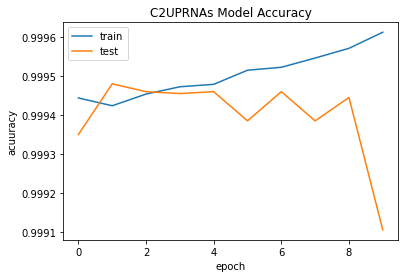

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('C2UPRNAs Model Accuracy')
plt.ylabel('acuuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

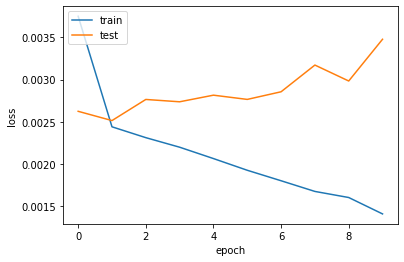

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = AN.predict(st_xtest)

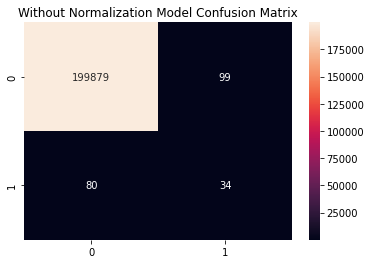

In [ ]:
from sklearn.metrics import confusion_matrix

ocm=confusion_matrix(y_test.argmax(axis=1),prediction.argmax(axis=1))
plt.title('Without Normalization Model Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("cohen_kappa_score",cohen_kappa_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("hamming_loss_score",hamming_loss(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Precision_score", metrics.precision_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Pecall_score",metrics.recall_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("F1_score",metrics.f1_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Accuracy_score",metrics.accuracy_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Roc_auc_score",metrics.roc_auc_score(y_test.argmax(axis=1),prediction.argmax(axis=1)))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=2))

matthews_corrcoef 0.27567654916458767
cohen_kappa_score 0.27485872320437965
hamming_loss_score 0.0008945884892949243
Precision_score 0.2556390977443609
Pecall_score 0.2982456140350877
F1_score 0.27530364372469635
Accuracy_score 0.9991054115107051
Roc_auc_score 0.6488752797895487
Fbeta_score 0.26315789473684215
Fbeta_score 0.27530364372469635
Fbeta_score 0.28862478777589134
